In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.metrics import silhouette_score
import umap
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora, models

In [2]:
news_data = pd.read_csv('guardian_articles.csv')
news_data.head(5)

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5


In [3]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149839 entries, 0 to 149838
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   article_id          149839 non-null  object
 1   sectionName         149839 non-null  object
 2   webTitle            149839 non-null  object
 3   webUrl              149839 non-null  object
 4   bodyContent         148731 non-null  object
 5   webPublicationDate  149839 non-null  object
 6   id                  149839 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.0+ MB


In [4]:
news_data.drop(columns=["article_id","webUrl","webPublicationDate","id"],inplace=True)

In [5]:
def lemmatize(text):
    lemmatized_text = WordNetLemmatizer().lemmatize(text, pos='n')
    if text == lemmatized_text:
        final_text = WordNetLemmatizer().lemmatize(text, pos='v')
        return final_text
    else:
        return lemmatized_text
    
    
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 3:
            result.append(lemmatize(token))
    return result

In [6]:
num_sections = news_data['sectionName'].nunique()
sampled_index = np.random.choice(news_data.index, size=20000, replace=False)

sampled_news_data = news_data.iloc[sampled_index]

sampled_news_data=sampled_news_data[sampled_news_data['bodyContent'].apply(lambda x: not isinstance(x, float))]
sampled_news_data['tokens'] = sampled_news_data['bodyContent'].apply(preprocess)

In [43]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

19852

In [8]:
sampled_news_data['tokens'].head(5)

95776                    [accountant, busy, tax, season, online, hacker, prey, individual, small, business, mob, street, criminal, write, jess, coburn, data, protection, expert, cpa, practice, advisor, criminal, likely, sit, desk, glue, monitor, chug, energy, drink, develop, effective, way, steal, today, version, gold, gold, data, accord, research, conduct, security, consult, firm, proofpoint, employee, website, visitor, small, company, small, account, firm, fewer, resource, security, target, tax, season, scam, usually, come, form, email, send, individual, employee, request, tax, information, email, include, legitimate, look, logo, letterhead, familiar, brand, tax, authority, include, warning, important, tax, information, attach, tax, change, affect, filing, recipient, click, attachment, malicious, code, release, device, second, ...]
146864                                                                                                               [world, oldest, dog, crown, steal, th

In [9]:
sampled_news_data['bodyContent'].head(5)

95776                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              It’s not just accountants who are busy this tax season, it’s online hackers too – and

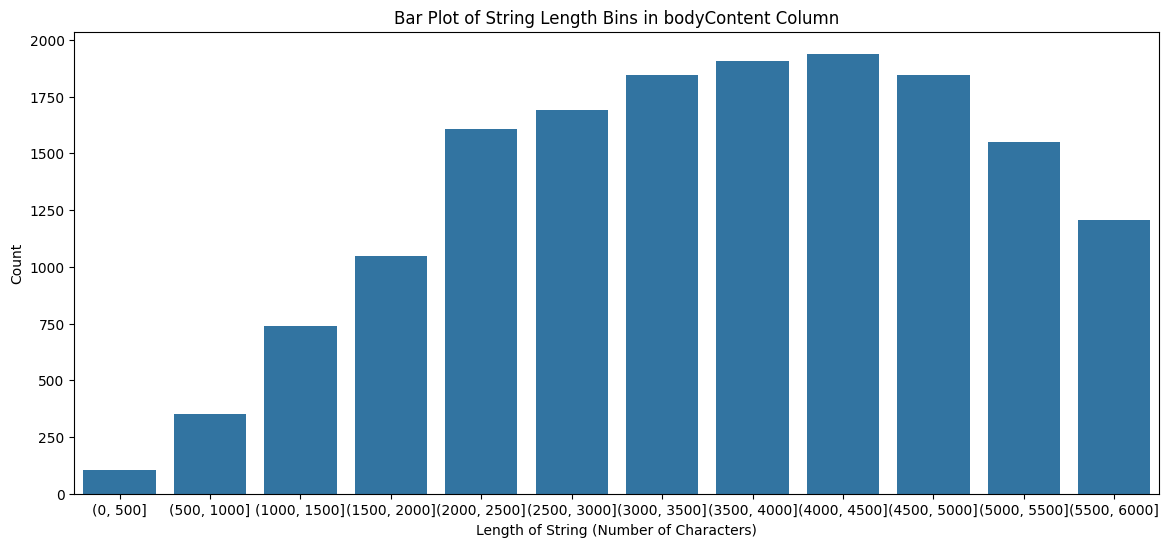

In [10]:
#See length of each article

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame called 'sampled_news_data'

# Step 1: Calculate the length of each string in the 'bodyContent' column
sampled_news_data['content_length'] = sampled_news_data['bodyContent'].apply(len)

# Step 2: Plot the distribution using a histogram
# Bin the lengths into ranges (you can adjust the binning as needed)
sampled_news_data['length_bins'] = pd.cut(sampled_news_data['content_length'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,5500,6000])

plt.figure(figsize=(14, 6))
sns.countplot(x='length_bins', data=sampled_news_data)

plt.title('Bar Plot of String Length Bins in bodyContent Column')
plt.xlabel('Length of String (Number of Characters)')
plt.ylabel('Count')
plt.show()



#### create dictionary and BoW_corpus & TF-IDF_corpus

In [11]:

dictionary = gensim.corpora.Dictionary(sampled_news_data['tokens'])
bow_corpus = [dictionary.doc2bow(doc) for doc in sampled_news_data['tokens']]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

#dictionary.filter_extremes(no_below=2, no_above=0.9,)

#### Train LDA models & save them


In [16]:
bow_lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=20, workers=8,iterations=100)

In [46]:
tfidf_lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=20, workers=6,iterations=100)

In [17]:
import os

current_directory = os.getcwd()
#print("Current Working Directory:", current_directory)
bow_model_path = os.path.join(current_directory, "bow_lda.model")
#tfidf_model_path = os.path.join(current_directory, "tfidf_lda.model")
# Save the model
bow_lda_model.save(bow_model_path)
#tfidf_lda_model.save(tfidf_model_path)

In [14]:
#bow_lda_model = gensim.models.LdaModel.load(bow_model_path)

In [18]:
#BOW model coherence
coherence_model_lda = gensim.models.CoherenceModel(model=bow_lda_model, texts=sampled_news_data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_lda}")

Coherence score: 0.39562091919955533


In [49]:
#tfidf model coherence
coherence_model_lda = gensim.models.CoherenceModel(model=tfidf_lda_model, texts=sampled_news_data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_lda}")

Coherence score: 0.5613353321702227


In [18]:
#View topics

for idx, topic in bow_lda_model.print_topics(-1,10):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.008*"year" + 0.004*"say" + 0.004*"new" + 0.004*"time" + 0.004*"world" + 0.004*"like" + 0.003*"music" + 0.003*"day" + 0.003*"song" + 0.003*"come"
Topic: 1 
Words: 0.017*"say" + 0.012*"australia" + 0.009*"government" + 0.008*"climate" + 0.008*"australian" + 0.007*"year" + 0.006*"university" + 0.005*"change" + 0.005*"new" + 0.004*"energy"
Topic: 2 
Words: 0.020*"say" + 0.010*"people" + 0.006*"government" + 0.005*"year" + 0.005*"health" + 0.005*"child" + 0.004*"work" + 0.004*"need" + 0.004*"case" + 0.004*"labour"
Topic: 3 
Words: 0.015*"say" + 0.009*"trump" + 0.006*"state" + 0.006*"people" + 0.005*"president" + 0.005*"country" + 0.005*"year" + 0.005*"right" + 0.003*"government" + 0.003*"election"
Topic: 4 
Words: 0.015*"say" + 0.010*"year" + 0.009*"company" + 0.006*"pay" + 0.006*"business" + 0.005*"new" + 0.005*"work" + 0.004*"market" + 0.004*"people" + 0.004*"time"
Topic: 5 
Words: 0.010*"game" + 0.010*"team" + 0.009*"player" + 0.008*"win" + 0.008*"play" + 0.007*"say" +

In [94]:
#View topics for a specific document
for index, score in sorted(bow_lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, bow_lda_model.print_topic(index, 10)))


Score: 0.7548055648803711	 
Topic: 0.008*"year" + 0.004*"say" + 0.004*"new" + 0.004*"time" + 0.004*"world" + 0.004*"like" + 0.003*"music" + 0.003*"day" + 0.003*"song" + 0.003*"come"

Score: 0.18537113070487976	 
Topic: 0.009*"like" + 0.006*"time" + 0.006*"people" + 0.006*"think" + 0.006*"say" + 0.005*"work" + 0.005*"know" + 0.005*"life" + 0.005*"year" + 0.004*"go"

Score: 0.03336549550294876	 
Topic: 0.017*"say" + 0.012*"australia" + 0.009*"government" + 0.008*"climate" + 0.008*"australian" + 0.007*"year" + 0.006*"university" + 0.005*"change" + 0.005*"new" + 0.004*"energy"

Score: 0.025136398151516914	 
Topic: 0.015*"say" + 0.009*"trump" + 0.006*"state" + 0.006*"people" + 0.005*"president" + 0.005*"country" + 0.005*"year" + 0.005*"right" + 0.003*"government" + 0.003*"election"


In [93]:
unseen_document = """Japan, a nation steeped in history and tradition, presents a unique blend of ancient customs and modern innovation. From the serene beauty of its landscapes to the bustling energy of its cities, Japanese culture is a captivating tapestry woven from various threads.
One of the most iconic aspects of Japanese culture is its traditional arts, such as tea ceremonies, calligraphy, and ikebana (flower arranging). The tea ceremony, known as chanoyu, embodies the principles of harmony, respect, purity, and tranquility. It is not merely about drinking tea; it is a ritual that fosters mindfulness and appreciation for the moment.
Japanese cuisine also plays a significant role in cultural identity. Dishes like sushi, ramen, and tempura are celebrated not only for their flavors but also for their aesthetic presentation. The emphasis on seasonal ingredients and meticulous preparation reflects a deep respect for nature and culinary artistry.
Festivals, or matsuri, are vibrant celebrations that showcase local traditions and community spirit. Events like the cherry blossom festivals in spring draw thousands who gather to admire the fleeting beauty of sakura trees, symbolizing the transient nature of life.
In contemporary culture, Japan is renowned for its contributions to technology and pop culture. Anime and manga have gained global popularity, influencing art and storytelling worldwide. The fusion of traditional elements with modern themes creates a dynamic cultural landscape that continues to evolve.
As Japan navigates the complexities of globalization, it remains committed to preserving its rich heritage while embracing innovation. This delicate balance ensures that Japanese culture remains not only relevant but also a source of inspiration for generations to come."""
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
tfidf_vector = tfidf[bow_vector]
topics = bow_lda_model.get_document_topics(bow_corpus[0])

# Print the inferred topics
print("Inferred Topics for the new document:")
for topic in topics:
    print(f"Topic {topic[0]}: Probability {topic[1]:.4f}")

Inferred Topics for the new document:
Topic 0: Probability 0.9976


In [88]:
unseen_document = """Japan, a nation steeped in history and tradition, presents a unique blend of ancient customs and modern innovation. From the serene beauty of its landscapes to the bustling energy of its cities, Japanese culture is a captivating tapestry woven from various threads.
One of the most iconic aspects of Japanese culture is its traditional arts, such as tea ceremonies, calligraphy, and ikebana (flower arranging). The tea ceremony, known as chanoyu, embodies the principles of harmony, respect, purity, and tranquility. It is not merely about drinking tea; it is a ritual that fosters mindfulness and appreciation for the moment.
Japanese cuisine also plays a significant role in cultural identity. Dishes like sushi, ramen, and tempura are celebrated not only for their flavors but also for their aesthetic presentation. The emphasis on seasonal ingredients and meticulous preparation reflects a deep respect for nature and culinary artistry.
Festivals, or matsuri, are vibrant celebrations that showcase local traditions and community spirit. Events like the cherry blossom festivals in spring draw thousands who gather to admire the fleeting beauty of sakura trees, symbolizing the transient nature of life.
In contemporary culture, Japan is renowned for its contributions to technology and pop culture. Anime and manga have gained global popularity, influencing art and storytelling worldwide. The fusion of traditional elements with modern themes creates a dynamic cultural landscape that continues to evolve.
As Japan navigates the complexities of globalization, it remains committed to preserving its rich heritage while embracing innovation. This delicate balance ensures that Japanese culture remains not only relevant but also a source of inspiration for generations to come."""
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
tfidf_vector = tfidf[bow_vector]
for index, score in sorted(tfidf_lda_model[tfidf_vector], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, tfidf_lda_model.print_topic(index, 10)))


Score: 0.9166907668113708	 
Topic: 0.001*"say" + 0.001*"government" + 0.001*"trump" + 0.001*"woman" + 0.001*"people" + 0.001*"child" + 0.001*"party" + 0.001*"game" + 0.001*"play" + 0.001*"player"

Score: 0.011946680024266243	 
Topic: 0.000*"doubtful" + 0.000*"bennell" + 0.000*"scorer" + 0.000*"nca" + 0.000*"oct" + 0.000*"amri" + 0.000*"nov" + 0.000*"aoc" + 0.000*"culleton" + 0.000*"searles"

Score: 0.011893854476511478	 
Topic: 0.001*"tbsp" + 0.001*"tsp" + 0.001*"garlic" + 0.000*"salt" + 0.000*"coriander" + 0.000*"chilli" + 0.000*"pokémon" + 0.000*"sauce" + 0.000*"onion" + 0.000*"chop"

Score: 0.011893738992512226	 
Topic: 0.000*"daw" + 0.000*"telstra" + 0.000*"clearview" + 0.000*"chatterbox" + 0.000*"nascar" + 0.000*"matafeo" + 0.000*"hiller" + 0.000*"quizmaster" + 0.000*"maréchal" + 0.000*"iglesias"

Score: 0.011893738992512226	 
Topic: 0.000*"rogan" + 0.000*"georgieva" + 0.000*"nso" + 0.000*"kabila" + 0.000*"haftar" + 0.000*"claudel" + 0.000*"noakes" + 0.000*"reo" + 0.000*"alopecia

#### get the topic vectors of each document


In [19]:
def get_vec_lda(model, corpus, k):
    """
    Get the LDA vector representation (probabilistic topic assignments for all documents)
    :return: vec_lda with dimension: (n_doc * n_topic)
    """
    n_doc = len(corpus)
    vec_lda = np.zeros((n_doc, k))
    for i in range(n_doc):
        # get the distribution for the i-th document in corpus
        for topic, prob in model.get_document_topics(corpus[i]):
            vec_lda[i, topic] = prob

    return vec_lda


In [42]:
bow_topic_vec = get_vec_lda(bow_lda_model, bow_corpus, 8)
bow_topic_vec[0]


19852

In [ ]:
tfidf_topic_vec = get_vec_lda(tfidf_lda_model, corpus_tfidf, 8)
tfidf_topic_vec[0]

#### Get BERT embeddings

In [21]:
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
bert_embeddings = bert_model.encode(sampled_news_data['bodyContent'].values, show_progress_bar=True)

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/621 [00:00<?, ?it/s]

#### Combine LDA topic vectors with bert vectors

In [152]:
combined_embeddings = combined_embeddings = np.c_[np.array(bow_topic_vec) * 50, np.array(bert_embeddings)]
        

#### Create autoencoder


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

class AutoencoderModule(nn.Module):
    def __init__(self, input_dim, latent_dim, activation):
        super(AutoencoderModule, self).__init__()
        if activation == 'relu':
            self.activation = nn.ReLU()
        # Extend for other activations if needed
        
        self.encoder = nn.Linear(input_dim, latent_dim)
        self.decoder = nn.Linear(latent_dim, input_dim)
        
    def forward(self, x):
        x = self.activation(self.encoder(x))
        x = self.activation(self.decoder(x))
        return x

In [28]:
class Autoencoder:
    def __init__(self, latent_dim=32, activation='relu', epochs=300, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.loss_fn = nn.MSELoss()
        self.optimizer = None
        self.his = []

    def fit(self, X):
        if self.model is None:
            self.model = AutoencoderModule(X.shape[1], self.latent_dim, self.activation)
            self.optimizer = optim.Adam(self.model.parameters())
        
        dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32))
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        X_train, X_test = train_test_split(X, test_size=0.2)
        
        train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32))
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        
        test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32))
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)
        
        for epoch in range(self.epochs):
            for batch in train_loader:
                inputs = batch[0]
                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, inputs)
                
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                
            # Validation loss
            with torch.no_grad():
                val_loss = sum(self.loss_fn(self.model(inputs), inputs) for inputs, in test_loader)
                self.his.append(val_loss / len(test_loader))


#### fit/train the autoencoder


In [29]:
autoencoder = Autoencoder(latent_dim=32)


In [153]:
autoencoder.fit(combined_embeddings)

#### Save/load autoencoder

In [154]:
# Save the trained model's state_dict
torch.save(autoencoder.model.state_dict(), 'autoencoder.pth')

In [ ]:
#load autoencoder model

#Initialize your model architecture
autoencoder = AutoencoderModule(input_dim=combined_embeddings.shape[1], latent_dim=32, activation='ReLu')

# Load the saved state_dict into your autoencoder
autoencoder.load_state_dict(torch.load('autoencoder.pth'))

#### inference from the autoencoder

In [ ]:
autoencoder.his

In [193]:
with torch.no_grad():
    latent_representation = autoencoder.model.encoder(torch.tensor(combined_embeddings, dtype=torch.float32))
        

In [156]:
print(latent_representation[0])

tensor([ 3.2656,  3.0906, -2.5753, -5.8271,  7.9474, -3.6555, -3.4309,  2.7435,
         7.2440, -0.1027,  7.2984,  0.8560,  7.9760,  7.6047, -4.5213, -3.3842,
         0.6102,  2.5455, -7.5681,  5.2500,  3.3622, -2.5236, -5.2609,  4.2620,
         5.8085, -4.8603, -4.5986,  2.2886,  1.7707,  1.7343,  1.6821,  6.0289])


In [ ]:
combined_embeddings[0]

In [ ]:
with torch.no_grad():
    decoded_latent_representation = autoencoder.model.decoder(latent_representation[0])

print(decoded_latent_representation)    

#### Train HDBSCAN

In [88]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10,prediction_data=True)

# Fit the model to your data
cluster_labels = clusterer.fit_predict(latent_representation)


In [118]:
new_cluster_labels, strengths = hdbscan.approximate_predict(clusterer, latent_representation[154].reshape(1, -1))
print("Predicted cluster labels for new data:")
print(new_cluster_labels)

print("Membership strengths for the predictions:")
print(strengths)

Predicted cluster labels for new data:
[4]
Membership strengths for the predictions:
[0.48847603]


In [63]:

# Number of clusters found
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Number of clusters found: {n_clusters}')

Number of clusters found: 15


In [ ]:
plt.scatter(latent_representation[:, 0], latent_representation[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from collections import Counter
import numpy as np

def get_topic_words(token_lists, labels):
    # Get unique labels excluding -1 (noise)
    unique_labels = [label for label in np.unique(labels) if label != -1]
    k = len(unique_labels)
    # Map labels to indices starting from 0
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        label = labels[i]
        if label != -1:
            idx = label_to_index[label]
            topics[idx] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # Get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True), word_counts))
    # Get topics
    topics = list(map(lambda x: [word for word, count in x[:10]], word_counts))

    return topics

topics = get_topic_words(sampled_news_data['tokens'], cluster_labels)

topics

In [68]:
cm = gensim.models.CoherenceModel(topics=topics, texts=sampled_news_data['tokens'], corpus=bow_corpus, dictionary=dictionary,
                            coherence='c_v')
cm.get_coherence()

0.4869281960167242

#### Kmeans


In [157]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(latent_representation)

KMeans()

In [95]:
k = len(np.unique(kmeans.labels_))
k

15

In [158]:
def get_topic_words(token_lists, labels):
    k = len(np.unique(labels))
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        topics[labels[i]] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True), word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:10])), word_counts))

    return topics

k_topics = get_topic_words(sampled_news_data['tokens'], kmeans.labels_)


In [205]:
print(k_topics[7])

['say', 'year', 'like', 'time', 'work', 'new', 'people', 'day', 'food', 'look']


In [160]:
cm = gensim.models.CoherenceModel(topics=topics, texts=sampled_news_data['tokens'], corpus=bow_corpus, dictionary=dictionary,
                            coherence='c_v')
cm.get_coherence()

0.4264663214357257

In [169]:
silhouette_score(latent_representation, kmeans.labels_)

0.4519752

In [99]:
kmeans.predict(latent_representation[0].reshape(1, -1))

array([8])

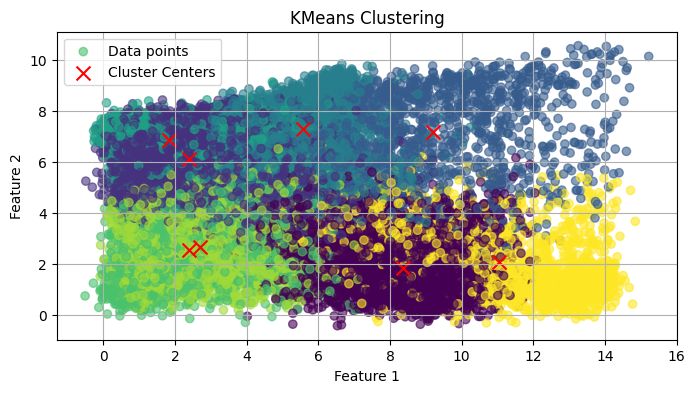

In [161]:
# Plot KMeans clusters
plt.figure(figsize=(8, 4))
plt.scatter(latent_representation[:, 0], latent_representation[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.6, label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### Gausian mixture model

In [178]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=42)
gmm.fit(latent_representation)

GaussianMixture(n_components=8, random_state=42)

In [195]:
# Predict the cluster labels for the training data
cluster_labels = gmm.predict(latent_representation)
print("Cluster labels for training data:")
print(cluster_labels)

Cluster labels for training data:
[6 2 2 ... 0 7 6]


In [196]:
probabilities = gmm.predict_proba(latent_representation[34].reshape(1, -1))
print("Probabilities for each cluster (first 5 data points):")
print(probabilities)

Probabilities for each cluster (first 5 data points):
[[0.         0.92046739 0.         0.         0.07953261 0.
  0.         0.        ]]


In [180]:
from collections import Counter
import numpy as np

def get_topic_words(token_lists, labels, top_n=10):
    # Find the number of unique clusters/topics.
    k = len(np.unique(labels))

    # Create a list to store the concatenated words for each topic.
    topics = ['' for _ in range(k)]

    # Concatenate words belonging to each topic.
    for tokens, label in zip(token_lists, labels):
        if label >= 0:  # Exclude noise/outliers if `-1` is used to represent them.
            topics[label] += ' ' + ' '.join(tokens)

    # Count word occurrences for each topic.
    word_counts = [Counter(topic.split()) for topic in topics]

    # Get the most common words for each topic.
    sorted_words = [counter.most_common(top_n) for counter in word_counts]

    # Extract only the words for each topic.
    topics = [[word for word, count in words] for words in sorted_words]

    return topics

# Example usage:
gmm_topics = get_topic_words(sampled_news_data['tokens'], cluster_labels)
print(gmm_topics)

[['say', 'year', 'people', 'work', 'time', 'like', 'new', 'day', 'come', 'go'], ['say', 'year', 'people', 'time', 'government', 'new', 'party', 'work', 'come', 'like'], ['like', 'say', 'year', 'time', 'work', 'film', 'play', 'life', 'new', 'think'], ['say', 'game', 'win', 'time', 'play', 'year', 'team', 'player', 'season', 'league'], ['say', 'year', 'time', 'game', 'player', 'team', 'play', 'like', 'win', 'go'], ['say', 'government', 'year', 'people', 'new', 'need', 'party', 'labour', 'work', 'time'], ['say', 'people', 'year', 'time', 'work', 'new', 'like', 'day', 'come', 'know'], ['say', 'people', 'year', 'government', 'trump', 'time', 'new', 'work', 'right', 'woman']]


In [203]:
print(gmm_topics[0])

['say', 'year', 'people', 'work', 'time', 'like', 'new', 'day', 'come', 'go']


In [166]:
cm = gensim.models.CoherenceModel(topics=gmm_topics, texts=sampled_news_data['tokens'], corpus=bow_corpus, dictionary=dictionary,
                            coherence='c_v')
cm.get_coherence()

0.4055069815155604

In [181]:
silhouette_score(latent_representation, cluster_labels)

-0.003380329

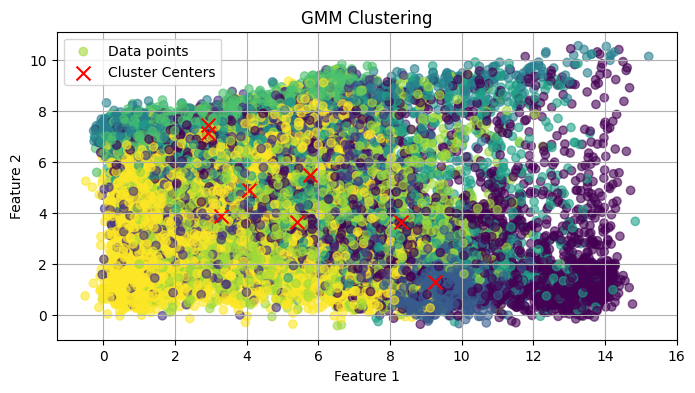

In [167]:
# Plot GMM clusters
plt.figure(figsize=(8, 4))
plt.scatter(latent_representation[:, 0], latent_representation[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6, label='Data points')

# Extract the GMM means (centroids) for visualization
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### Get the topics of unseen data

In [216]:
unseen_document = """### The World of Football and the Legacy of Liverpool

Football, known as **soccer** in some parts of the world, is the world's most popular sport, capturing the hearts of millions of fans across the globe. Played by two teams of eleven players each, the objective is to score goals by getting the ball into the opponent's net. The simplicity of the game, combined with its fast-paced nature and deep-rooted traditions, has made it a global phenomenon.

Football's appeal lies not only in the game itself but also in the deep connections it creates between fans and their favorite teams. One such club with a storied legacy is **Liverpool Football Club**. Founded in **1892**, Liverpool is based in the vibrant city of Liverpool, England, and is one of the most successful clubs in the history of English football.

Liverpool has won **19 English league titles**, **6 UEFA Champions League** titles, and numerous other domestic and international trophies, making it one of the most decorated clubs in European football. The team plays its home games at **Anfield**, a stadium known for its electric atmosphere and the passionate support of the **Kop**, a famous stand where die-hard fans gather.

The club's motto, **"You'll Never Walk Alone,"** symbolizes the unity and loyalty between the team and its fans. This anthem is sung with pride before every home game, creating an emotional bond that resonates with Liverpool supporters worldwide.

In recent years, under the management of **Jürgen Klopp**, Liverpool has returned to the pinnacle of football. The team won the **Premier League** in the **2019-2020** season, ending a 30-year wait for a league title. They also secured the **UEFA Champions League** in **2019**, defeating Tottenham Hotspur in the final and adding to their impressive European record.

Liverpool’s style of play, often characterized by high intensity, pressing, and fast-paced attacking football, has made them a formidable opponent in both domestic and European competitions. Star players like **Mohamed Salah**, **Virgil van Dijk**, and **Alisson Becker** have played crucial roles in the team’s recent successes, helping to solidify Liverpool’s reputation as a powerhouse in modern football.

Football, with its ability to bring people together, transcends borders, languages, and cultures. For Liverpool fans, supporting their team is about more than just the game; it's about being part of a community with shared passion and pride. As Liverpool continues to compete at the highest level, its history and legacy remain a testament to the enduring spirit of the beautiful game."""

bow_vector = dictionary.doc2bow(preprocess(unseen_document))
vec_lda = np.zeros((1, 8))

for topic, prob in bow_lda_model.get_document_topics(bow_vector):
    vec_lda[0, topic] = prob

bert_embedding = bert_model.encode([unseen_document], show_progress_bar=False)
combined_embedding = np.c_[vec_lda * 50, bert_embedding]

with torch.no_grad():
    unseen_latent_representation = autoencoder.model.encoder(torch.tensor(combined_embedding, dtype=torch.float32))

# Predict the cluster label for the new data point
new_cluster_label = gmm.predict(unseen_latent_representation)
print("Predicted cluster label for the new data point:")
print(new_cluster_label)

# Get the membership probabilities for each cluster
probabilities = gmm.predict_proba(unseen_latent_representation.reshape(1, -1))
print("Membership probabilities for the new data point:")
print(probabilities)



Predicted cluster label for the new data point:
[4]
Membership probabilities for the new data point:
[[0.00000000e+000 3.21392918e-022 1.62940909e-134 2.65787114e-049
  1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]


In [217]:
new_cluster_label = kmeans.predict(unseen_latent_representation)
print("Predicted cluster label for the new data point:")
print(new_cluster_label)

Predicted cluster label for the new data point:
[4]


In [218]:
print(k_topics[4])
print(gmm_topics[4])

['say', 'game', 'player', 'year', 'time', 'play', 'win', 'team', 'season', 'league']
['say', 'year', 'time', 'game', 'player', 'team', 'play', 'like', 'win', 'go']
